In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import pandas as pd

import random
import tensorflow
import keras
from sklearn import metrics
#!pip install peakutils
#import peakutils
from sklearn.utils import shuffle
import tensorflow as tf
from scipy.interpolate import *
from scipy.signal import *
from sklearn.model_selection import train_test_split


Using TensorFlow backend.


In [4]:
! git clone https://github.com/vishnurmurthy/Myocardial_Ischemia_Detection
!ls

large_data = pd.DataFrame({"Signal":[], "Label":[]})
large_data

datafiles = ['s20011.xz','s20131.xz','s20251.xz','s20341.xz','s20471.xz','s20591.xz','s30721.xz','s20021.xz','s20141.xz',
's20351.xz','s20481.xz','s20601.xz','s30731.xz','s20031.xz','s20151.xz','s20271.xz','s20361.xz','s20491.xz','s20621.xz',
's20272.xz','s20371.xz','s20501.xz','s20431.xz','s20551.xz','s20181.xz','s30661.xz','s20301.xz','s20231.xz','s20321.xz',
's20631.xz','s30741.xz','s20051.xz','s20171.xz','s20273.xz','s20381.xz','s20511.xz','s20641.xz','s30742.xz','s20061.xz',
's20274.xz','s20391.xz','s20521.xz','s20651.xz','s30751.xz','s20071.xz','s20191.xz','s20281.xz','s20401.xz','s20531.xz',
's30752.xz','s20081.xz','s20201.xz','s20291.xz','s20411.xz','s20541.xz','s30671.xz','s30761.xz','s20091.xz','s20211.xz',
's30681.xz','s30771.xz','s20101.xz','s20221.xz','s20311.xz','s20441.xz','s20561.xz','s30691.xz','s30781.xz','s20111.xz',
's20451.xz','s20571.xz','s30701.xz','s30791.xz','s20121.xz','s20241.xz','s20331.xz','s20461.xz','s20581.xz','s30711.xz', 
's30732.xz','s20041.xz','s20161.xz','s30801.xz', 's20261.xz',]

!ls


Cloning into 'Myocardial_Ischemia_Detection'...
remote: Counting objects: 1036, done.
remote: Compressing objects: 100% (44/44), done.
remote: Total 1036 (delta 20), reused 21 (delta 6), pack-reused 984
Receiving objects: 100% (1036/1036), 499.66 MiB | 3.05 MiB/s, done.
Resolving deltas: 100% (129/129), done.
Checking out files: 100% (594/594), done.
machine_learning_model	       preprocessing   raw_data   realtime.py
Myocardial_Ischemia_Detection  processed_data  README.md
machine_learning_model	       preprocessing   raw_data   realtime.py
Myocardial_Ischemia_Detection  processed_data  README.md


In [7]:
#os.chdir('Myocardial_Ischemia_Detection/processed_data')
for i in datafiles:
  dat = pd.read_pickle(i)
  for count, signal in enumerate(dat['Signal']):
    dat['Signal'][count] = dat['Signal'][count] - np.mean(dat['Signal'][count])
    dat['Signal'][count] = dat['Signal'][count] / np.std(dat['Signal'][count])
  print(i)
  large_data = large_data.append(dat)
os.chdir('../..')


s20011.xz
s20131.xz
s20251.xz
s20341.xz
s20471.xz
s20591.xz
s30721.xz
s20021.xz
s20141.xz
s20351.xz
s20481.xz
s20601.xz
s30731.xz
s20031.xz
s20151.xz
s20271.xz
s20361.xz
s20491.xz
s20621.xz
s20272.xz
s20371.xz
s20501.xz
s20431.xz
s20551.xz
s20181.xz
s30661.xz
s20301.xz
s20231.xz
s20321.xz
s20631.xz
s30741.xz
s20051.xz
s20171.xz
s20273.xz
s20381.xz
s20511.xz
s20641.xz
s30742.xz
s20061.xz
s20274.xz
s20391.xz
s20521.xz
s20651.xz
s30751.xz
s20071.xz
s20191.xz
s20281.xz
s20401.xz
s20531.xz
s30752.xz
s20081.xz
s20201.xz
s20291.xz
s20411.xz
s20541.xz
s30671.xz
s30761.xz
s20091.xz
s20211.xz
s30681.xz
s30771.xz
s20101.xz
s20221.xz
s20311.xz
s20441.xz
s20561.xz
s30691.xz
s30781.xz
s20111.xz
s20451.xz
s20571.xz
s30701.xz
s30791.xz
s20121.xz
s20241.xz
s20331.xz
s20461.xz
s20581.xz
s30711.xz
s30732.xz
s20041.xz
s20161.xz
s30801.xz
s20261.xz


# of data rows for ST:  420279
# of data rows for RTST:  121867
# of data rows for Normal:  429084
nx 0


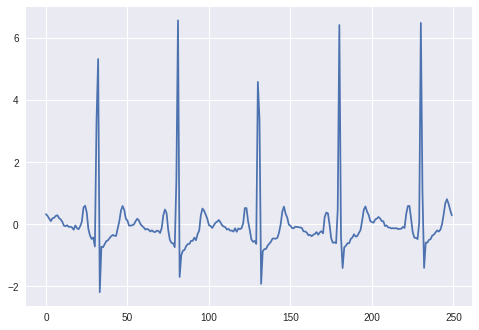

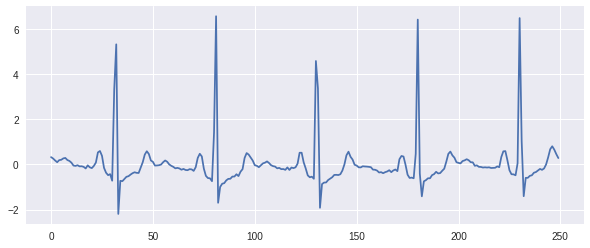

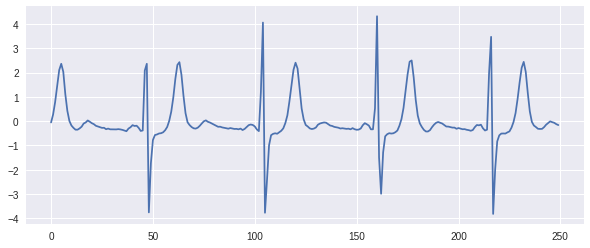

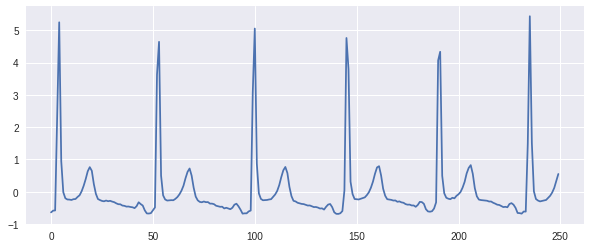

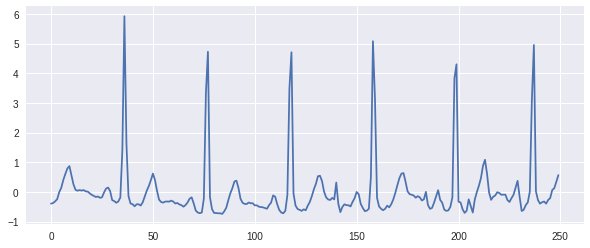

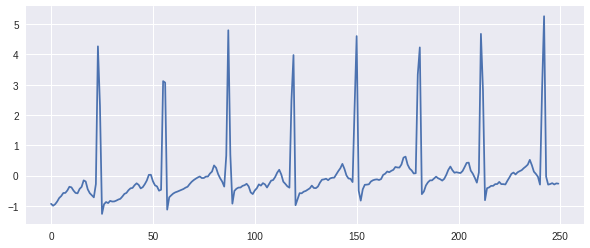

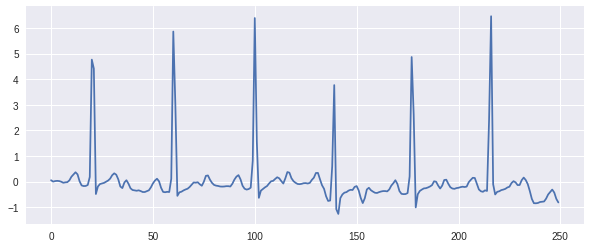

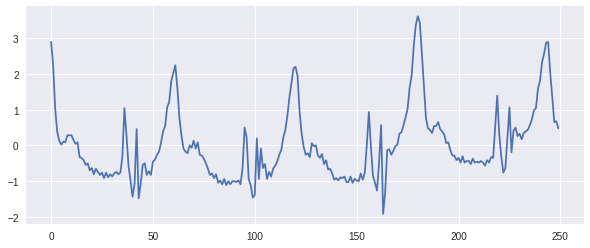

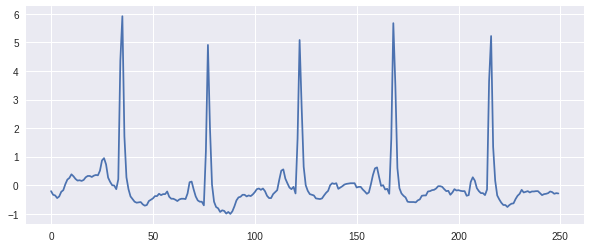

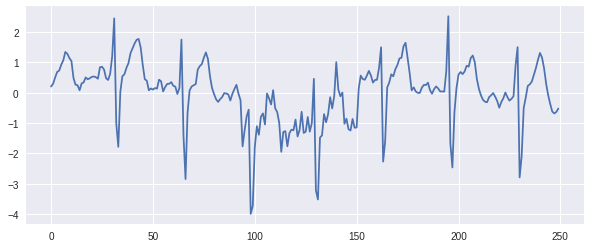

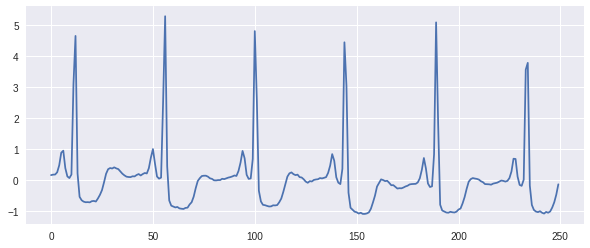

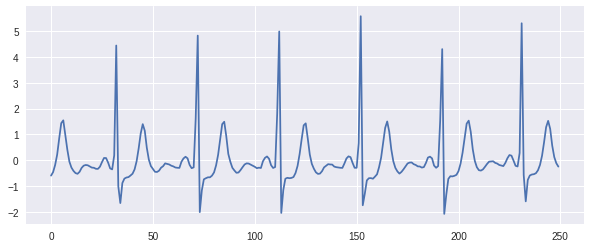

In [8]:
large_data = large_data[large_data.Label != 'scct'] #dropping rows with shifts, we are not classifying
large_data = large_data[large_data.Label != 'sst']

large_data['Label'] = large_data['Label'].map({'st': 0, 'rtst': 1, 'normal': 2})

print("# of data rows for ST: ", len(large_data.loc[large_data['Label'] == 0]))
print("# of data rows for RTST: ", len(large_data.loc[large_data['Label'] == 1]))
print("# of data rows for Normal: ", len(large_data.loc[large_data['Label'] == 2]))

newx = 0
for i in large_data['Signal']:
	if len(i)!= 250:
		print(len(i))
		newx+=1
print("nx", newx)

#convert to ints

large_data['Label'] = large_data['Label'].astype('category').cat.codes

#randomly shuffle dataframe

large_data = large_data.sample(frac=1).reset_index(drop=True)

plt.plot(np.arange(0, 250), large_data['Signal'][0])

LEN = large_data.shape[0]

for i in range(0, 676483, 67000):
    plt.figure(figsize = (10, 4))
    plt.plot(np.arange(0, 250), large_data['Signal'][i])
    plt.show()

In [0]:
y = large_data['Label'].values
X = []
for i in large_data['Signal']:
    X.append(i)
X = np.array(X)

print("Y")
print(y.shape)
print("X")
print(X.shape)

In [0]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2)

y_train = tf.keras.utils.to_categorical(y_train, 3)
y_train = y_train.astype(np.float32)
y_val = tf.keras.utils.to_categorical(y_val, 3)
y_val = y_val.astype(np.float32)

#X_train = X_train.astype(np.float32)
#X_val = X_val.astype(np.float32)

print("Training")
print(X_train.shape, y_train.shape)
print("Validation")
print(X_val.shape, y_val.shape)

Training
(541187, 250) (541187, 3)
Validation
(135297, 250) (135297, 3)


In [0]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(128, activation='relu', input_shape = X_train[0].shape))
model.add(tf.keras.layers.GaussianDropout(.25))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.GaussianDropout(.25))
model.add(tf.keras.layers.Dense(129, activation='relu'))
model.add(tf.keras.layers.GaussianDropout(.25))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.GaussianDropout(.25))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=tf.train.AdamOptimizer(learning_rate=0.001), metrics=['accuracy'])
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 128)               32128     
_________________________________________________________________
gaussian_dropout_5 (Gaussian (None, 128)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               16512     
_________________________________________________________________
gaussian_dropout_6 (Gaussian (None, 128)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 129)               16641     
_________________________________________________________________
gaussian_dropout_7 (Gaussian (None, 129)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               16640     
__________

In [0]:
print(X_train[0].shape)

In [0]:
model.fit(X_train, y_train, validation_data = (X_val, y_val), verbose = True, epochs=25)


Train on 541187 samples, validate on 135297 samples
Epoch 1/25
541187/541187 [==============================] - 66s - loss: 0.9760 - acc: 0.4584 - val_loss: 0.9518 - val_acc: 0.4841
Epoch 2/25
541187/541187 [==============================] - 59s - loss: 0.9477 - acc: 0.4892 - val_loss: 0.9211 - val_acc: 0.5180
Epoch 3/25
541187/541187 [==============================] - 59s - loss: 0.9276 - acc: 0.5103 - val_loss: 0.8966 - val_acc: 0.5457
Epoch 4/25
541187/541187 [==============================] - 61s - loss: 0.9123 - acc: 0.5273 - val_loss: 0.8803 - val_acc: 0.5595
Epoch 5/25
541187/541187 [==============================] - 60s - loss: 0.8988 - acc: 0.5389 - val_loss: 0.8649 - val_acc: 0.5707
Epoch 6/25
541187/541187 [==============================] - 63s - loss: 0.8884 - acc: 0.5483 - val_loss: 0.8542 - val_acc: 0.5769
Epoch 7/25
208992/541187 [==========>...................] - ETA: 38s - loss: 0.8820 - acc: 0.5549

In [0]:
#Save the model

model.save_weights('BWSI2018model_weights.h5')

with open('BWSI2018model_architecture.json', 'w') as f:
    f.write(model.to_json())